In [1]:
# Julian Esteban Cordero Ramos
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset= pd.read_csv("C:/Users/julia/Documents/UNAD/8. OCTAVO SEMESTRE/ANALISIS DE DATOS/Tarea 4/MALL.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
#dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 2})


In [32]:
df = pd.DataFrame(data)

# Definir el mapeo de valores
gender_mapping = {'Male': 1.0, 'Female': 2.0}

# Aplicar el mapeo a la columna 'Gender'
data['Gender'] = data['Gender'].map(gender_mapping)

In [33]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,2.0,20,16,6
3,4,2.0,23,16,77
4,5,2.0,31,17,40


In [34]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [35]:
data.isna().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:

data.dropna()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,2.0,20,16,6
3,4,2.0,23,16,77
4,5,2.0,31,17,40
...,...,...,...,...,...
195,196,2.0,35,120,79
196,197,2.0,45,126,28
197,198,1.0,32,126,74
198,199,1.0,32,137,18


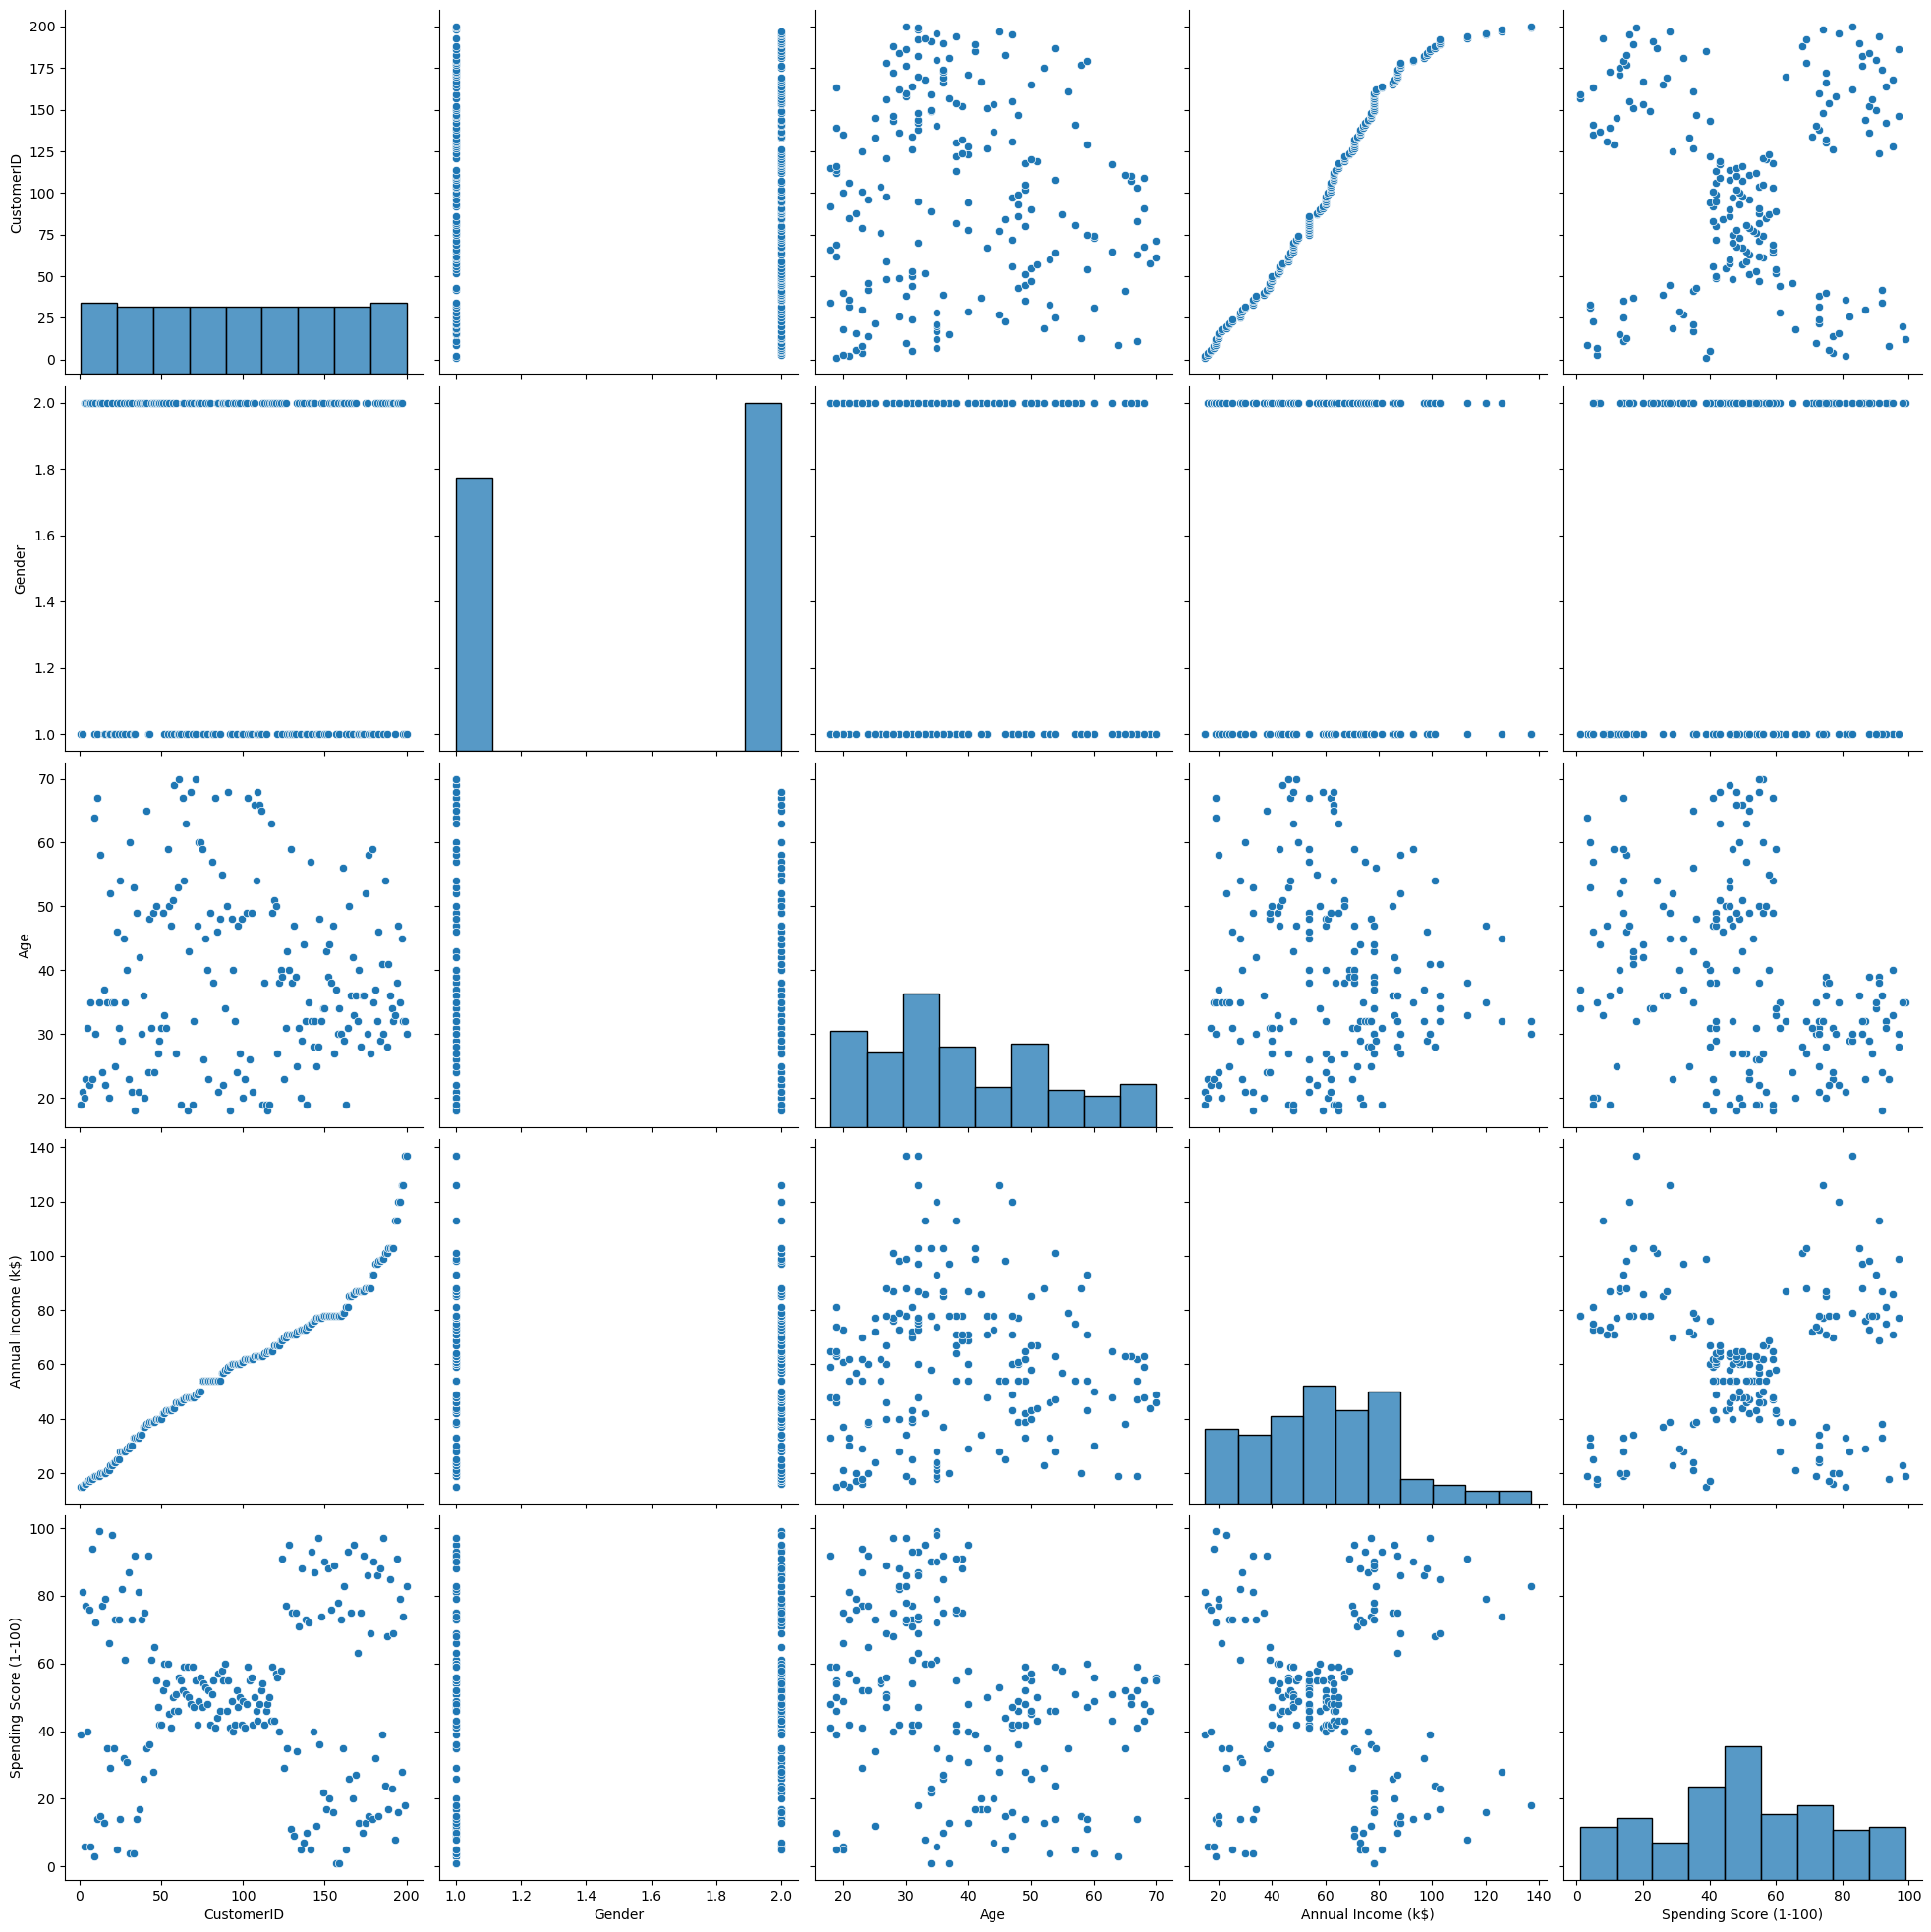

In [39]:

sns.pairplot(data.dropna(), size=4,kind='scatter')

In [40]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


# k means

In [43]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,0.886405,-0.276302,2.268791,1.118061
196,1.671450,0.886405,0.441365,2.497807,-0.861839
197,1.688771,-1.128152,-0.491602,2.497807,0.923953
198,1.706091,-1.128152,-0.491602,2.917671,-1.250054


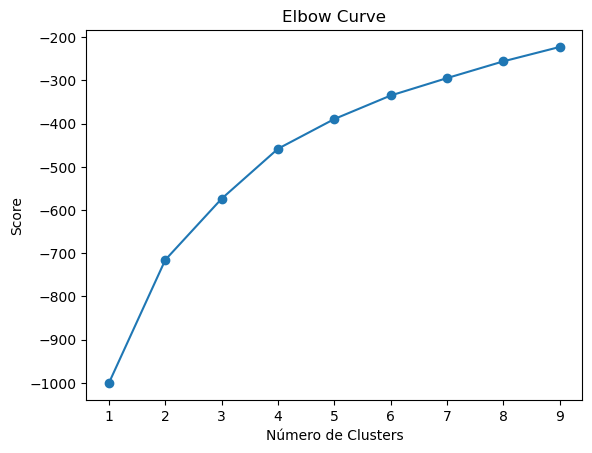

In [44]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [46]:
# Decido entrenar con 4 clusters de acuerdo a la grafica anterior.
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.03142803, -0.04717012, -0.43908961,  0.95706585,  1.1919166 ],
       [-0.5399239 , -0.03830962,  1.11903093, -0.48378813, -0.32979234],
       [ 1.02668595, -0.12087344,  0.10226753,  0.96816757, -1.18211652],
       [-0.86932119,  0.15699654, -0.93705024, -0.83543667,  0.3195416 ]])

In [47]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan','black']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

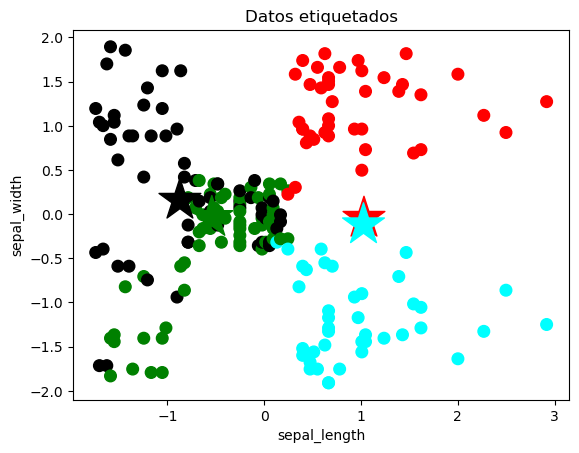

In [48]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

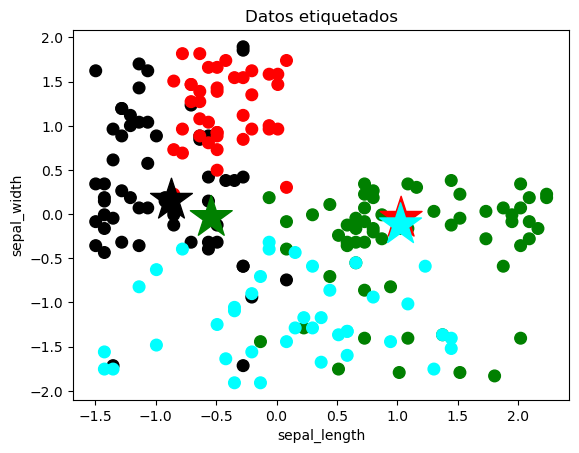

In [49]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

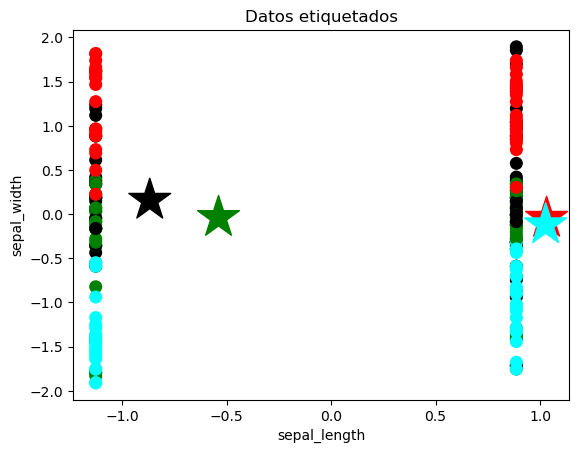

In [50]:
f1 = X['Gender'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

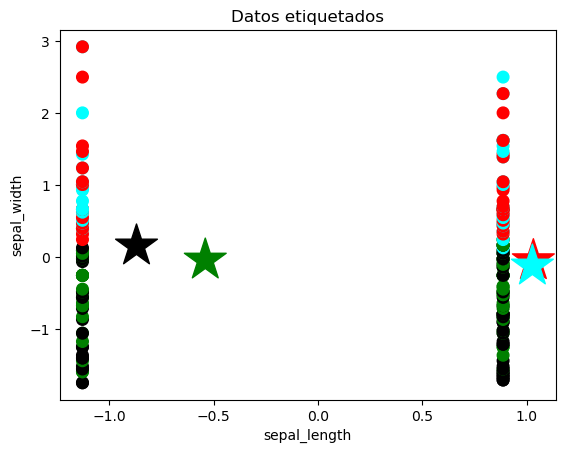

In [51]:
f1 = X['Gender'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

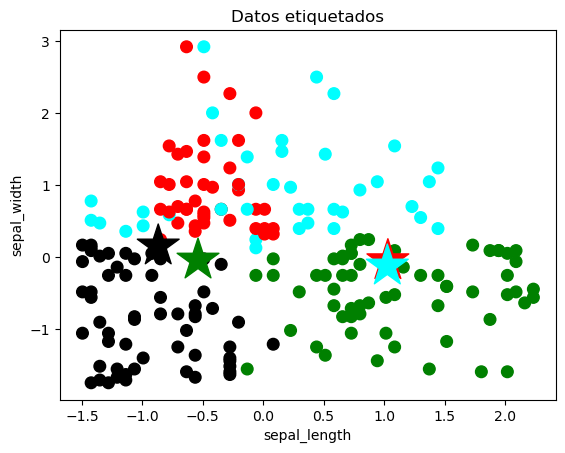

In [52]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [54]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25,0.2]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['green']


In [55]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.30168788175214856
Índice de Calinski-Harabasz: 77.2331342318564
Inertia (suma de cuadrados dentro de los clusters): 458.26577910727224
Davies-Bouldin Index: 1.2712578497459326


In [58]:
# Decido entrenar con 5 clusters de acuerdo a la grafica anterior.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.55983056, -1.12815215,  1.27693446, -0.5080351 , -0.36686375],
       [-0.46614744,  0.88640526,  0.16341161, -0.42730373, -0.2943044 ],
       [-1.0473944 , -0.3578802 , -1.03196278, -1.02163845,  0.73441258],
       [ 1.10728918, -0.2647704 ,  0.20350983,  1.05609358, -1.27778394],
       [ 1.04747082, -0.07050951, -0.45213014,  0.97293875,  1.21414431]])

In [59]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan','black','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

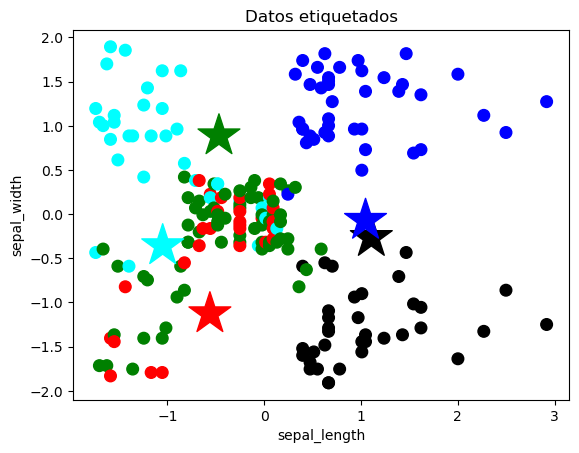

In [60]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [66]:
# Calcular medidas de calidad para K-Means 5 Klusters
print("Medidas de calidad para K-Means con 5 Clusters:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means con 5 Clusters:
Puntaje de silueta: 0.3174755152355542
Índice de Calinski-Harabasz: 75.19316539016705
Inertia (suma de cuadrados dentro de los clusters): 393.32543949912343
Davies-Bouldin Index: 1.150102376990798


# Analisis de KMeans

# Silueta: entre más cercano a menos uno a uno esté es porque esta bien clasificado, en este caso nos quedaremos con los 0.31 de los 5 Klusters
# Calinski: El valor más alto lo tenemos con 4 clusters, con 77.23 frente a 75,19
# Inertia: tenemos inicialmente 4 clusters, con 458.23 y 5 klusters con 393.32 con el valor mas bajo y lo cual nos indica que tenemos una menor dispersión entre los puntos de cada cluster
# Davies: inicialmente 4 clusters, con 1.27 y 5 klusters con 1.15 con el valor mas bajo y lo cual nos indica que tenemos una menor dispersión entre los puntos de cada cluster


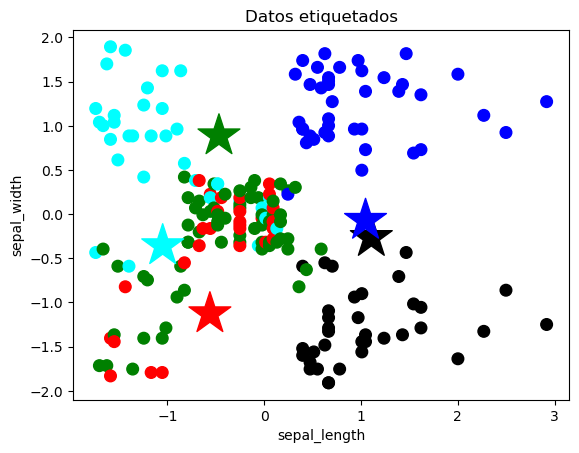

In [67]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

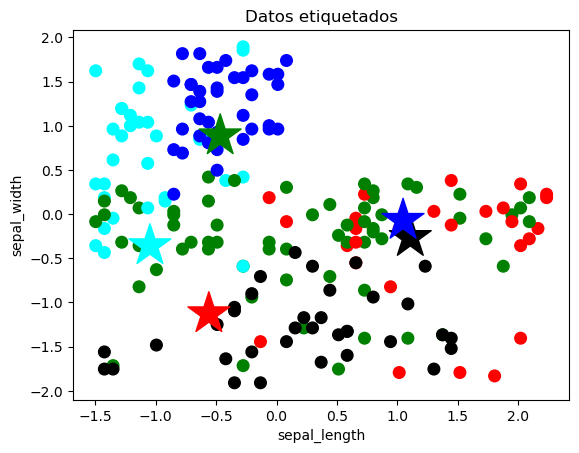

In [68]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# hierarchical clustering

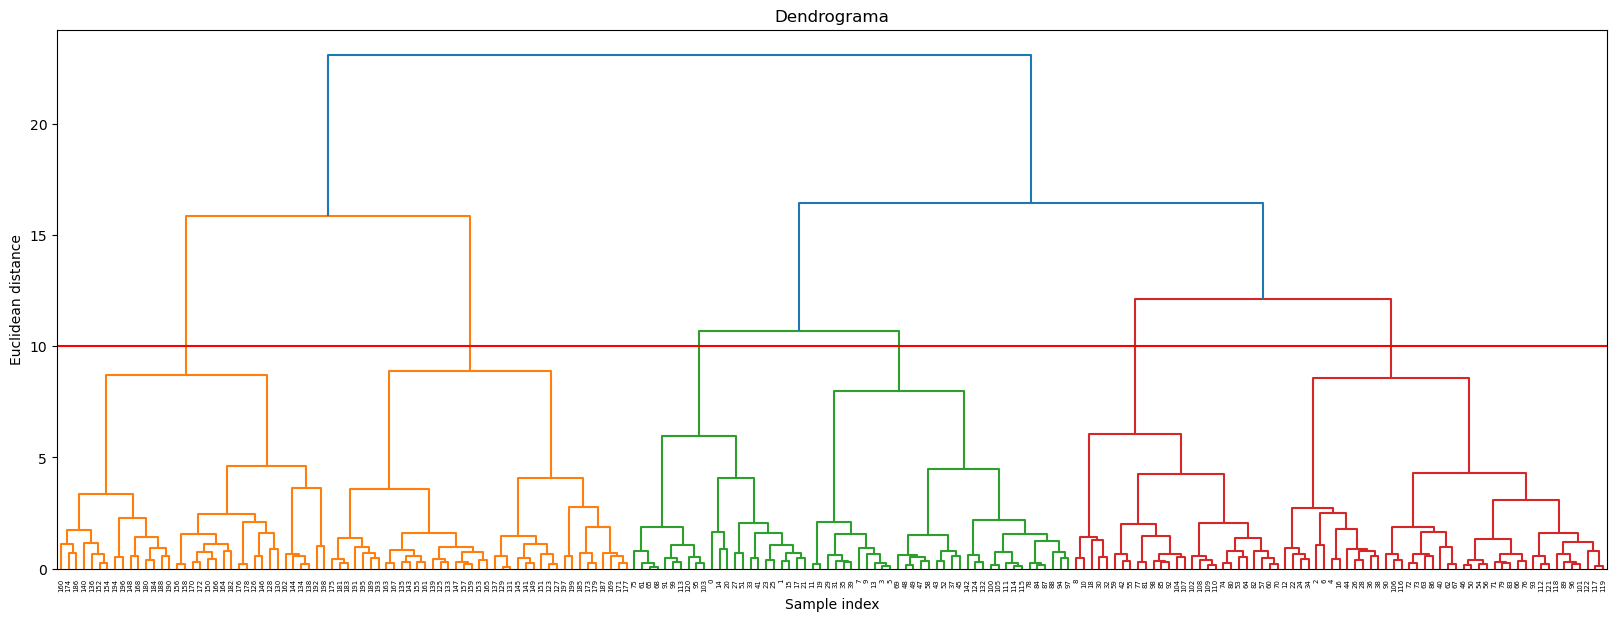

In [69]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [70]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([5, 5, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 5, 5, 2, 5, 4, 3, 5, 5,
       2, 5, 2, 5, 2, 5, 2, 3, 4, 3, 4, 5, 2, 3, 2, 3, 2, 3, 2, 5, 4, 3,
       2, 3, 2, 3, 3, 3, 2, 5, 3, 4, 2, 4, 2, 4, 3, 4, 4, 5, 2, 2, 4, 5,
       2, 2, 5, 3, 4, 2, 2, 2, 4, 5, 2, 4, 3, 2, 4, 4, 4, 2, 3, 4, 2, 3,
       3, 2, 2, 5, 4, 2, 3, 5, 2, 3, 4, 5, 3, 2, 4, 5, 4, 3, 2, 4, 4, 4,
       4, 3, 2, 5, 3, 3, 2, 2, 2, 2, 5, 2, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [78]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['#FF0000','#00FF00','#0000FF','#FFFF00','#FFFFFF','#000000']
asignar=[]
for row in labels:
    asignar.append(colores[row])

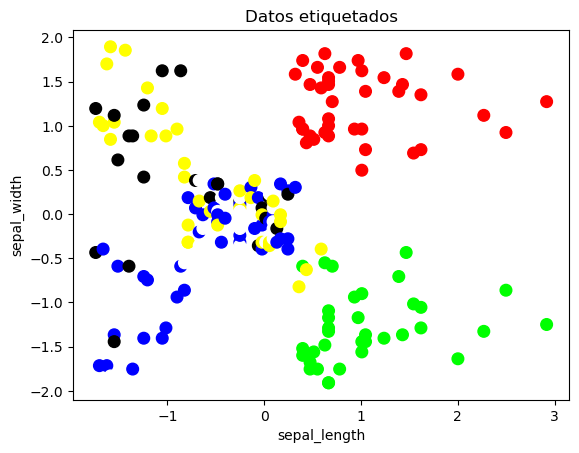

In [79]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [80]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

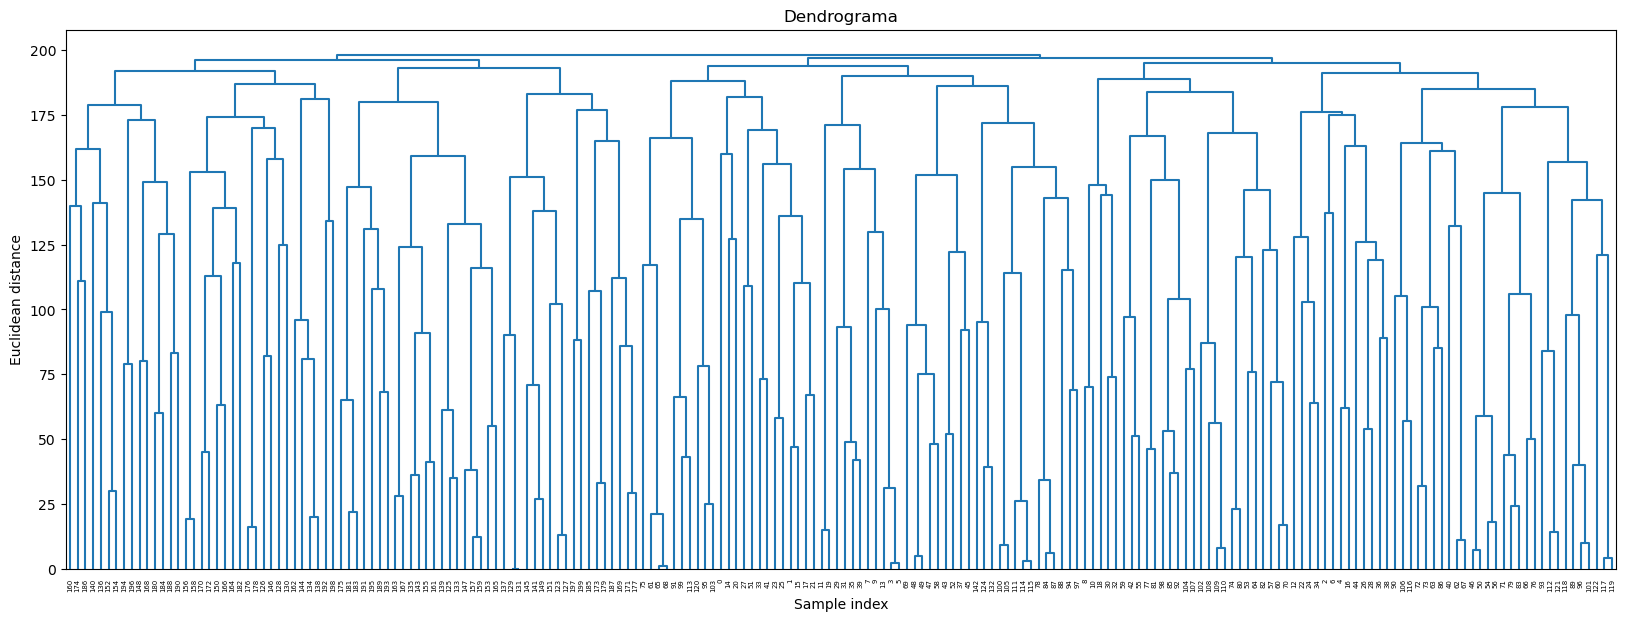

In [81]:
plot_dendrogram(hier_clustering, color_threshold=0)

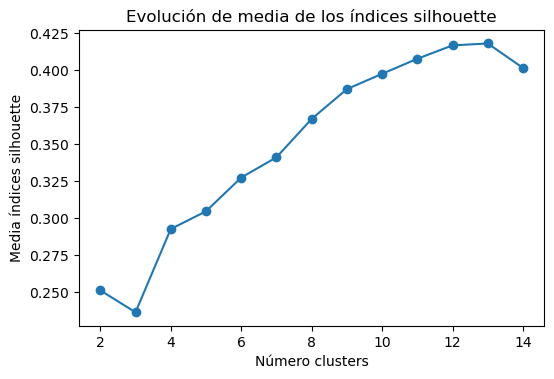

In [82]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [83]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3273267369164873
Índice de Calinski-Harabasz: 74.28233987716496
Davies-Bouldin Index: 1.1440948835825626


In [84]:
hier_clustering = AgglomerativeClustering(n_clusters=13)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([ 5,  5,  8,  9,  8,  9,  8,  9, 10,  9, 10,  9,  8,  9,  5,  5,  8,
        5, 10,  9,  5,  5,  8,  5,  8,  5,  8,  5,  8,  9, 10,  9, 10,  5,
        8,  9,  8,  0,  8,  9,  1,  5,  2,  0,  8,  0,  1,  0,  0,  0,  1,
        5,  0,  2,  1,  2,  1,  2,  0,  2,  2, 11,  1,  1,  2, 11,  1,  1,
       11,  0,  2,  1,  1,  1,  2, 11,  1,  2,  0,  1,  2,  2,  2,  1,  0,
        2,  1,  0,  0,  1,  1, 11,  2,  1,  0, 11,  1,  0,  2, 11,  0,  1,
        2, 11,  2,  0,  1,  2,  2,  2,  2,  0,  1, 11,  0,  0,  1,  1,  1,
        1, 11,  1,  1,  3,  0,  6, 12,  3, 12,  3, 12,  3,  0,  6,  4,  6,
        7,  3,  4,  6,  7,  3,  0,  6,  4,  3, 12,  6,  7,  3, 12,  3,  7,
        6,  7,  6, 12,  6, 12,  6,  7,  6,  4,  6, 12,  6, 12,  6,  7,  3,
       12,  3, 12,  3,  7,  6, 12,  3, 12,  3,  7,  6, 12,  6,  7,  3,  7,
        3,  7,  6,  7,  6,  4,  6,  7,  6,  7,  3,  4,  3], dtype=int64)

In [85]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.417838349674108
Índice de Calinski-Harabasz: 87.89898378554966
Davies-Bouldin Index: 0.8522775123614319
